In [66]:
import numpy as np
import uxarray as ux
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation 
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

In [67]:
SCRIP_path = "/glade/u/home/nforcone/newmesh1.g"
SCRIP = ux.open_grid(SCRIP_path)
grid_path = "/glade/u/home/nforcone/Sandy_ESMF.nc"

In [68]:
multiple_data_paths = [
    "/glade/derecho/scratch/nforcone/CAM_6_4_025_20240829_FHIST_TEST_2_ne16np4.WEST_ATLANTIC.ne16x2/run/CAM_6_4_025_20240829_FHIST_TEST_2_ne16np4.WEST_ATLANTIC.ne16x2.cam.h0i.2012-10-21-07200.nc",
    "/glade/derecho/scratch/nforcone/CAM_6_4_025_20240829_FHIST_TEST_2_ne16np4.WEST_ATLANTIC.ne16x2/run/CAM_6_4_025_20240829_FHIST_TEST_2_ne16np4.WEST_ATLANTIC.ne16x2.cam.h0i.2012-10-28-50400.nc",
]
uxds_multi = ux.open_mfdataset(
    grid_path, multiple_data_paths, combine="nested", concat_dim="time"
)

/glade/work/nforcone/conda-envs/Fall2024_ENV_NF/lib/python3.11/site-packages/uxarray/io/_esmf.py:89: RuntimeWarning: invalid value encountered in cast
  face_node_connectivity = in_ds["elementConn"].values.astype(INT_DTYPE)


In [69]:
def UpdatePlot(frame):
    ax.clear()
    pc = uxds_multi["PS"][frame].to_polycollection()
    pc.set_antialiased(False)
    pc.set_cmap(MyCmap)
    pc.set_norm(normBounded)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_collection(pc)
    ax.set_extent([west_extent, east_extent, south_extent, north_extent], crs=MyProj)
    ax.set_xticks([0, -20, -40, -60, -80], crs=MyProj)
    ax.set_yticks([0, 10, 20, 30, 40, 50, 60], crs=MyProj)
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    plt.title(f'{uxds_multi.time[frame].values.item().strftime("%b %d %H:%M:%S")} UTC')

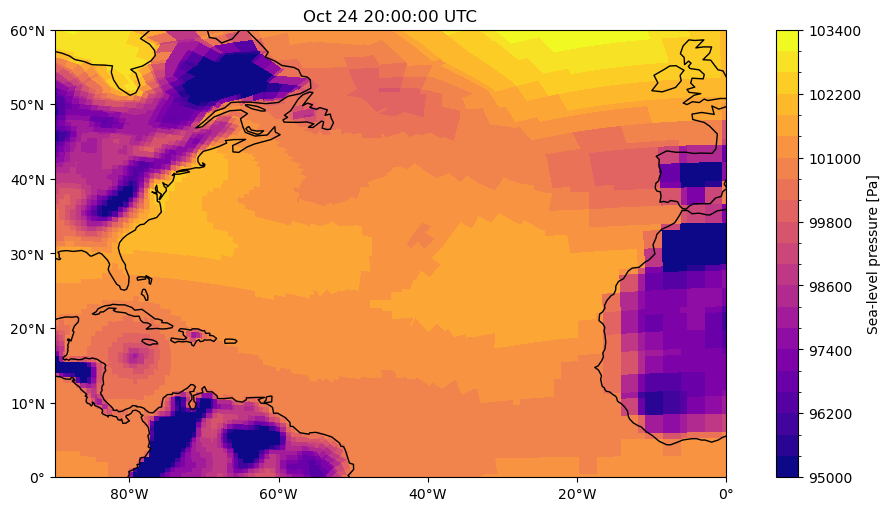

In [70]:
MyCmap = mpl.cm.plasma
bounds = np.arange(95000, 103500, step=400)
normBounded = mpl.colors.BoundaryNorm(bounds, MyCmap.N)
SM = cm.ScalarMappable(norm=normBounded, cmap=MyCmap)
lc = SCRIP.to_linecollection(colors="black", linewidths=0.5, alpha=0.3)

MyProj = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1,
    1,
    figsize=(10, 5),
    facecolor="w",
    constrained_layout=True,
    subplot_kw=dict(projection=MyProj),
)
fig.colorbar(SM, ax=ax, label="Sea-level pressure [Pa]")

# extents
west_extent = -90
east_extent = 0
south_extent = 0
north_extent = 60

movie = animation.FuncAnimation(fig, UpdatePlot, frames=range(45, 120), repeat=True)
movie.save(filename="/glade/u/home/nforcone/SandyRepo/anim.gif", writer="pillow")